In [1]:
from utils.rbm import RBM
from utils.utils import *
from utils.dbn import DBN
from utils.vae import *
from utils.gan import *

## Dataset

Execute this if you are loading the MNIST data for the first time :

In [ ]:
nums = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
X_train, X_test, Y_train, Y_test = lire_MNIST(nums)
np.save('data/X_train_MNIST.npy', X_train)
np.save('data/X_test_MNIST.npy', X_test)
np.save('data/Y_train_MNIST.npy', Y_train)
np.save('data/Y_test_MNIST.npy', Y_test)

If not, execute this :

In [2]:
X_train = np.load('X_train_MNIST.npy')

In [3]:
## Random sample of 15000 images
np.random.seed(15)
idx = np.random.choice(X_train.shape[0], 15000, replace=False)
data = X_train[idx]

## RBM

In [12]:
RBM_10K = RBM(784, 12)
print(RBM_10K.count_parameters())

10204


Mean Square Error at iteration 0: 0.10473611978473112
Mean Square Error at iteration 10: 0.08141280818430151
Mean Square Error at iteration 20: 0.07680926958235508
Mean Square Error at iteration 30: 0.07209238002489937
Mean Square Error at iteration 40: 0.06832969591563101
Mean Square Error at iteration 50: 0.06672185042649093
Mean Square Error at iteration 60: 0.0658966638715655
Mean Square Error at iteration 70: 0.06523233821162235
Mean Square Error at iteration 80: 0.06461392190000156
Mean Square Error at iteration 90: 0.06410607922947836
Mean Square Error at iteration 100: 0.06366613824149181
Mean Square Error at iteration 110: 0.06299564350113725
Mean Square Error at iteration 120: 0.06251426611860987
Mean Square Error at iteration 130: 0.0621244690596523
Mean Square Error at iteration 140: 0.06162600088123384
Mean Square Error at iteration 150: 0.061318827038892715
Mean Square Error at iteration 160: 0.061118971053597926
Mean Square Error at iteration 170: 0.06096619087590666
Mea

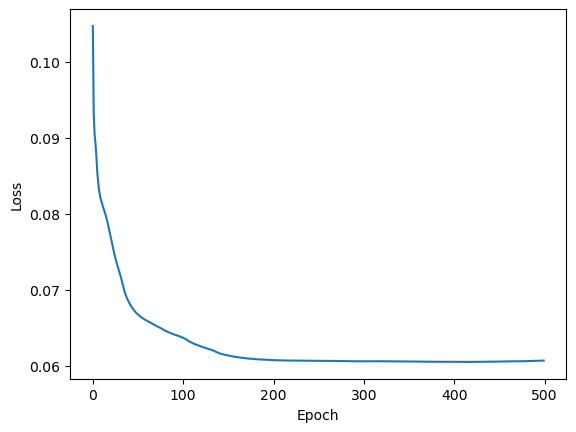

In [13]:
learning_rate = 0.01
batch_size = 96
nb_iter = 500
nb_gibbs_iteration = 200
nb_image_generate = 15

_ = RBM_10K.train(data, learning_rate, batch_size, nb_iter, verbose=True, plot=True)

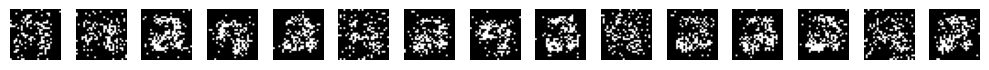

In [68]:
display_image(RBM_10K.generer_image(nb_gibbs_iteration,nb_image_generate),28,28,save=False)

## DBN

In [8]:
q = 12
DBN_10k = DBN([784,q,q])
print(DBN_10k.count_parameters())

10372


In [9]:
learning_rate = 0.01
batch_size = 96
nb_iter = 500
nb_gibbs_iteration = 200
nb_image_generate = 15

_ = DBN_10k.train(data ,learning_rate, batch_size, nb_iter, verbose=True)

Mean Square Error at iteration 0: 0.10465175943984048
Mean Square Error at iteration 10: 0.08142592815805907
Mean Square Error at iteration 20: 0.07703805222812547
Mean Square Error at iteration 30: 0.07166298648592838
Mean Square Error at iteration 40: 0.06845311381073062
Mean Square Error at iteration 50: 0.06612889346707326
Mean Square Error at iteration 60: 0.06472798695654973
Mean Square Error at iteration 70: 0.06397826629088821
Mean Square Error at iteration 80: 0.06352033642270986
Mean Square Error at iteration 90: 0.06320605804531977
Mean Square Error at iteration 100: 0.06275787025202602
Mean Square Error at iteration 110: 0.062361170940698735
Mean Square Error at iteration 120: 0.0621329984891365
Mean Square Error at iteration 130: 0.0619610739926334
Mean Square Error at iteration 140: 0.06185013951558916
Mean Square Error at iteration 150: 0.061747952854730066
Mean Square Error at iteration 160: 0.0616647937659763
Mean Square Error at iteration 170: 0.061598373949370934
Mea

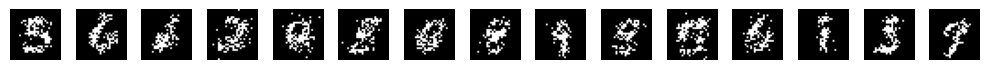

In [10]:
display_image(DBN_10k.generer_image(nb_gibbs_iteration,nb_image_generate),28,28,save=False)

## VAE

For VAE and GAN, it is required to load the MNIST data differently

In [69]:
# MNIST Dataset
train_loader = load_mnist_vae(size=15000,batch_size=96)

In [2]:
vae_10k = VAE(x_dim=784, h_dim1=6, h_dim2=6, z_dim=2)
print(vae_10k.count_parameters())
optimizer = torch.optim.Adam(vae_10k.parameters(), lr=1e-3)
n_epochs = 100

10328


In [75]:
vae_10k.train_model(train_loader=train_loader, optimizer=optimizer, device='cpu', epochs=n_epochs, verbose=True)

Train Epoch: 1 [0/15000 (0%)]	Loss: 555.062256
Train Epoch: 1 [9600/15000 (64%)]	Loss: 490.819255
====> Epoch: 1 Average loss: 497.0568
Train Epoch: 2 [0/15000 (0%)]	Loss: 371.858114
Train Epoch: 2 [9600/15000 (64%)]	Loss: 239.686076
====> Epoch: 2 Average loss: 260.3318
Train Epoch: 3 [0/15000 (0%)]	Loss: 226.537760
Train Epoch: 3 [9600/15000 (64%)]	Loss: 223.755147
====> Epoch: 3 Average loss: 216.3285
Train Epoch: 4 [0/15000 (0%)]	Loss: 212.760681
Train Epoch: 4 [9600/15000 (64%)]	Loss: 211.240397
====> Epoch: 4 Average loss: 208.5539
Train Epoch: 5 [0/15000 (0%)]	Loss: 206.743388
Train Epoch: 5 [9600/15000 (64%)]	Loss: 193.925273
====> Epoch: 5 Average loss: 205.2798
Train Epoch: 6 [0/15000 (0%)]	Loss: 217.085225
Train Epoch: 6 [9600/15000 (64%)]	Loss: 214.296427
====> Epoch: 6 Average loss: 203.1044
Train Epoch: 7 [0/15000 (0%)]	Loss: 195.799703
Train Epoch: 7 [9600/15000 (64%)]	Loss: 194.440511
====> Epoch: 7 Average loss: 201.2471
Train Epoch: 8 [0/15000 (0%)]	Loss: 203.265727
T

In [92]:
n_images = 15
latent_dim_10k = 2

z_10k = torch.randn(n_images, latent_dim_10k).to('cpu')
generated_images_small = vae_10k.decoder(z_10k).detach().cpu().numpy()

In [95]:
# Make generated_images_small in black and white instead of grayscale
generated_images_small_binarized = np.where(generated_images_small > 0.5, 1, 0)

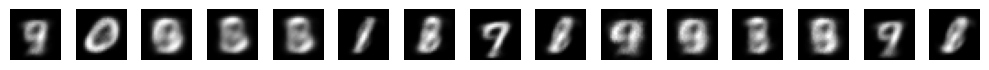

In [93]:
display_image(generated_images_small,28,28,save=False)

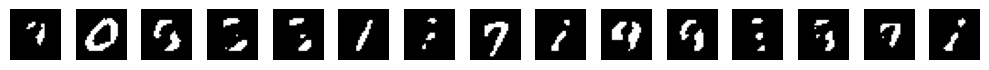

In [96]:
display_image(generated_images_small_binarized,28,28,save=False)

## GAN

For VAE and GAN, it is required to load the MNIST data differently

In [ ]:
train_loader, mnist_dim = load_mnist_gan(size=15000,batch_size=96)
device = 'cpu'

In [5]:
z_dim_10k = 2
gan_10k = GAN(g_input_dim=z_dim_10k, 
                g_output_dim=mnist_dim, 
                g_hidden_dim=4,
                g_depth=1,
                d_input_dim=mnist_dim,
                d_hidden_dim=8,
                d_depth=1,
                lr=0.0002,
                device=device)
print(gan_10k.count_parameters())
n_epochs = 50

10221


In [111]:
gan_10k.train(train_loader=train_loader, epochs=n_epochs)

[0/50]: loss_d: 0.501, loss_g: 1.634
[1/50]: loss_d: 0.125, loss_g: 2.906
[2/50]: loss_d: 0.099, loss_g: 3.048
[3/50]: loss_d: 0.124, loss_g: 2.701
[4/50]: loss_d: 0.203, loss_g: 2.088
[5/50]: loss_d: 0.318, loss_g: 1.526
[6/50]: loss_d: 0.439, loss_g: 1.366
[7/50]: loss_d: 0.442, loss_g: 1.660
[8/50]: loss_d: 0.387, loss_g: 1.971
[9/50]: loss_d: 0.347, loss_g: 2.177
[10/50]: loss_d: 0.347, loss_g: 2.217
[11/50]: loss_d: 0.330, loss_g: 2.299
[12/50]: loss_d: 0.348, loss_g: 2.143
[13/50]: loss_d: 0.398, loss_g: 1.789
[14/50]: loss_d: 0.458, loss_g: 1.438
[15/50]: loss_d: 0.430, loss_g: 1.511
[16/50]: loss_d: 0.488, loss_g: 1.513
[17/50]: loss_d: 0.557, loss_g: 1.318
[18/50]: loss_d: 0.424, loss_g: 1.716
[19/50]: loss_d: 0.543, loss_g: 1.281
[20/50]: loss_d: 0.439, loss_g: 1.438
[21/50]: loss_d: 0.506, loss_g: 1.412
[22/50]: loss_d: 0.448, loss_g: 1.525
[23/50]: loss_d: 0.433, loss_g: 1.704
[24/50]: loss_d: 0.521, loss_g: 1.445
[25/50]: loss_d: 0.478, loss_g: 1.474
[26/50]: loss_d: 0.469

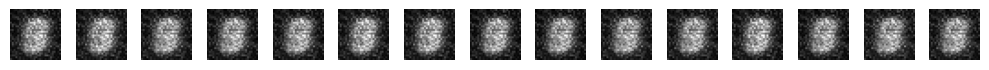

In [112]:
n_images = 15
generated_images_gan_10k = gan_10k.generate_images(n_images, device)

generated_images_gan_10k = generated_images_gan_10k.detach().cpu().numpy()
## Visualize the generated images


In [124]:
generated_images_gan_10k_binarized = np.where(generated_images_gan_10k > -0.5, 1, 0)

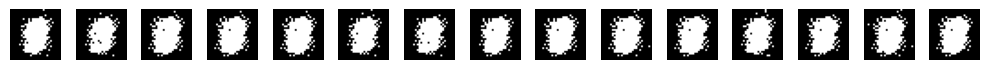

In [125]:
display_image(generated_images_gan_10k_binarized,28,28,save=False)